In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(25)

m = 100

X = 2 * rng.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

y = 4 + 3 * X + rng.rand(m, 1)

In [3]:
def gradient_descent():
    n_iterations = 1000
    learning_rate = 0.05
    
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    
    for i in range(n_iterations):
        gradients = 2 * X_b.T @ (X_b @ thetas - y) / m
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

    return thetas_path

In [4]:
def compute_mse(theta):
    return ((X_b @ theta - y) ** 2).sum() / m

In [5]:
theta0, theta1 = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
r, c = theta0.shape
r, c

(50, 50)

In [6]:
cost_map = np.array([[0 for x in range(c)] for x in range(r)])
for i in range(r):
    for j in range(c):
        theta = np.array([theta0[i,j], theta1[i,j]])
        cost_map[i,j] = compute_mse(theta)
        
cost_map

array([[5760, 5613, 5468, ..., 1003,  950,  899],
       [5616, 5471, 5327, ...,  951,  900,  851],
       [5474, 5331, 5190, ...,  902,  852,  805],
       ...,
       [1675, 1620, 1568, ..., 1254, 1293, 1334],
       [1648, 1595, 1544, ..., 1319, 1360, 1403],
       [1624, 1573, 1524, ..., 1387, 1430, 1475]])

In [7]:
exact_solution = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
thetas = np.array(gradient_descent())

In [8]:
thetas[-1].ravel(), 

(array([4.43647008, 3.0305456 ]),)

In [9]:
[exact_solution[0,0], exact_solution[1,0]]

[4.436470965632662, 3.030544809954586]

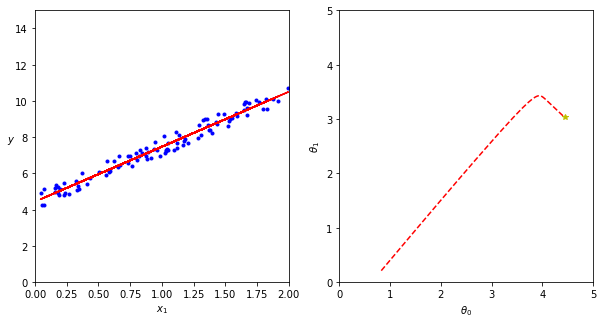

In [10]:
fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

data_ax.plot(X, y, 'b.')



i = -1
[data_plot] = data_ax.plot(X, X_b @ thetas[-1,:], 'r-')
[cost_plot] = cost_ax.plot(thetas[:,0], thetas[:,1], 'r--')
cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')

data_ax.set_xlim([0, 2])
data_ax.set_ylim([0, 15])
cost_ax.set_xlim([0, 5])
cost_ax.set_ylim([0, 5])

data_ax.set_xlabel(r'$x_1$')
data_ax.set_ylabel(r'$y$', rotation=0)
cost_ax.set_xlabel(r'$\theta_0$')
cost_ax.set_ylabel(r'$\theta_1$')

plt.show()